**Oscar Miguel Ortega Lozano - 2220528 - Grupo J1**

**Oscar Julian Gamboa Mancipe - 2220520 - Grupo J3**

**Yeison Adrian Caceres Torres - 2220075 - Grupo J3**


*Se ha desarrollado un programa que busca facilitarle al cliente el escoger una ruta de vuelos para ir de una ciudad a otra, ofreciéndole la información de los vuelos directos que existen entre éstas, así como el valor del ticket y la duración del vuelo, también dándole la opción de averiguar la ruta más económica o la ruta más rápida según indique; todo ésto de una manera rápida e intuitiva, haciendo que cualquier persona pueda utilizarlo sin problemas.*

Al analizar diferentes algoritmos para encontrar el camino más corto desde un nodo origen a un nodo destino, uno de los algoritmos considerados fue el algoritmo de Floyd-Warshall. Sin embargo, se descartó debido a su complejidad en tiempo de O(V^3), donde V representa el número de vértices en el grafo. Este algoritmo realiza un bucle triple anidado para calcular los caminos más cortos entre todos los pares de vértices, lo que resulta en un alto costo computacional. Dado que nuestro objetivo era encontrar una solución más eficiente para recorrer nuestro grafo no dirigido, optamos por el algoritmo de Bellman-Ford.

El algoritmo de Bellman-Ford ofrece una alternativa viable, ya que su complejidad en tiempo depende únicamente de la implementación y las características del grafo en el que se aplica. En el peor de los casos, su complejidad es O(VE), donde V es el número de vértices y E es el número de aristas en el grafo. Esto implica que el algoritmo itera sobre cada arista en el grafo un máximo de V-1 veces para encontrar los caminos más cortos desde un vértice de origen a todos los demás vértices.


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import sys

class GrafoVuelos: # Se crea una clase llamada GrafoVuelos la cual va a tener todos los metodos que estarán detrás de la lógica de nuestro programa

    def __init__(self, nodos): # Se define el metodo constructor pidiendo como parametro el numero de nodos (ciudades) que se van a manejar
        self.nodos = nodos
        self.listaAdyacencia = [[] for _ in range(nodos)] # Se crea una lista de listas como atributo la cual contendrá la informacion de las aristas
        self.listaAdyacenciaCopia = [[] for _ in range(nodos)] # Se crea una copia de la lista

    def agregarArista(self, origen, destino, duracion, precio): # Se crea el metodo para agregar las aristas y se pide como parametro las ciudades (nodos) a relacionar y los respectivos pesos
        self.listaAdyacencia[origen].append((destino, duracion, precio))
        self.listaAdyacencia[destino].append((origen, duracion, precio))

    def imprimirGrafo(self): # Se decide crear un metodo que imprima todas las relaciones directas (aristas) del grafo mostrando los dos pesos que se manejan
        for i in range(self.nodos):
            nombreOrigen = self.obtenerNombreCiudad(i);
            print(f"{nombreOrigen}: ", end="")
            for arista in self.listaAdyacencia[i]:
                destino, duracion, precio = arista
                nombreDestino = self.obtenerNombreCiudad(destino)
                print(f"({nombreDestino}, {duracion}, {precio}) ", end="")
            print()

    def obtenerConexiones(self, ciudadOrigen): # Se crea éste método con el fin de obtener las conexiones directas de un nodo (entero) en específico el cual entra como parametro
        conexiones = self.listaAdyacencia[ciudadOrigen]
        return conexiones

    def dibujarGrafo(self): # Se crea un método usando la librería networkx para dibujar el grafo (sin pesos)
        grafo_nx = nx.Graph()
        for i in range(self.nodos):
            for arista in self.listaAdyacencia[i]:
                destino, duracion, precio = arista
                grafo_nx.add_edge(i, destino, duracion=duracion, precio=precio)

        plt.figure(figsize=(6, 3))
        pos = nx.spring_layout(grafo_nx)
        nx.draw_networkx_nodes(grafo_nx, pos, node_color='blue', node_size=500)
        nx.draw_networkx_edges(grafo_nx, pos, width=1.0, alpha=0.8)
        nx.draw_networkx_labels(grafo_nx, pos, font_color='black', font_size=10)
        plt.axis('off')
        plt.show()


    def obtenerNombreCiudad(self, indice): # En un principio se usó enteros como indices para facilitar la manipulación de los nodos así que este método define a que ciudad representa cada número
        nombres_ciudades = ["Bucaramanga", "Bogotá", "Medellín", "Miami", "Denver", "Nueva York", "París", "Madrid", "Valencia"]
        return nombres_ciudades[indice]

    def obtenerDuracionVuelo(self, origen, destino):
        for arista in self.listaAdyacencia[origen]:
            if arista[0] == destino:
                return arista[1]
        return sys.maxsize

    def obtenerPrecioVuelo(self, origen, destino):
        for arista in self.listaAdyacencia[origen]:
            if arista[0] == destino:
                return arista[2]
        return sys.maxsize

    def vueloMasRapido(self):
        origen = int(input("Ingrese el número de la ciudad de origen: ")) # Se solicita la ciudad de origen al usuario
        while origen < 0 or origen > 8:
            print("¡La opción ingresada no existe!")
            print("")
            origen = int(input("Ingrese nuevamente el número de la ciudad de origen: "))
        print("")
        destino = int(input("Ingrese el número de la ciudad de destino: ")) # Se solicita la ciudad de destino al usuario
        while destino < 0 or destino > 8:
            print("¡La opción ingresada no existe!")
            print("")
            destino = int(input("Ingrese nuevamente el número de la ciudad de destino: "))

        distancias = [sys.maxsize] * self.nodos # Se inicializan las distancias y padres de cada nodo
        padres = [None] * self.nodos
        distancias[origen] = 0

        for _ in range(self.nodos - 1): # Aplicamos el algoritmo de Bellman-Ford para encontrar el camino más corto
            for u in range(self.nodos):
                for v, duracion, _ in self.listaAdyacencia[u]:
                    if distancias[u] + duracion < distancias[v]:
                        distancias[v] = distancias[u] + duracion
                        padres[v] = u

        recorrido = [] # Se construye el recorrido y calcular el tiempo total de vuelo
        tiempo_total = distancias[destino]

        while destino is not None:
            recorrido.insert(0, destino)
            destino = padres[destino]

        print("")
        print("Vuelo más rápido desde " + self.obtenerNombreCiudad(recorrido[0]) + " a " + self.obtenerNombreCiudad(recorrido[-1]) + ":\n") # Imprimimos el recorrido más rápido
        precioTotal = 0
        for i in range(len(recorrido) - 1):
            origen = recorrido[i]
            destino = recorrido[i + 1]
            ciudad_origen = self.obtenerNombreCiudad(origen)
            ciudad_destino = self.obtenerNombreCiudad(destino)
            duracion = self.obtenerDuracionVuelo(origen, destino)
            precio = self.obtenerPrecioVuelo(origen, destino)
            precioTotal += precio
            print(f"{ciudad_origen} -> {ciudad_destino} \t Duración: {duracion} minutos.\t Valor: ${precio}")
        print(f"\nTiempo total de vuelo: {tiempo_total} minutos.\t Valor total del vuelo: ${precioTotal}.")


    def vueloMasBarato(self):
        origen = int(input("Ingrese el número de la ciudad de origen: ")) # Se solicita la ciudad de origen al usuario
        while origen < 0 or origen > 8:
            print("¡La opción ingresada no existe!")
            print("")
            origen = int(input("Ingrese nuevamente el número de la ciudad de origen: ")) # Se solicita la ciudad de destino al usuario
        print("")
        destino = int(input("Ingrese el número de la ciudad de destino: "))
        while destino < 0 or destino > 8:
            print("¡La opción ingresada no existe!")
            print("")
            destino = int(input("Ingrese nuevamente el número de la ciudad de destino: "))

        precios = [sys.maxsize] * self.nodos # Se inicializan las distancias y padres de cada nodo
        padres = [None] * self.nodos
        precios[origen] = 0

        for _ in range(self.nodos - 1): # Aplicamos el algoritmo de Bellman-Ford para encontrar el camino más corto
            for u in range(self.nodos):
                for v, duracion, precio in self.listaAdyacencia[u]:
                    if precios[u] + precio < precios[v]:
                        precios[v] = precios[u] + precio
                        padres[v] = u

        recorrido = [] # Se construye el recorrido y calcular el tiempo total de vuelo
        precio_total = precios[destino]

        while destino is not None:
            recorrido.insert(0, destino)
            destino = padres[destino]

        print("\nVuelo más económico desde " + self.obtenerNombreCiudad(recorrido[0]) + " a " + self.obtenerNombreCiudad(recorrido[-1]) + ":\n") # Imprimimos el recorrido más económico
        duracionTotal = 0
        for i in range(len(recorrido) - 1):
            origen = recorrido[i]
            destino = recorrido[i + 1]
            ciudad_origen = self.obtenerNombreCiudad(origen)
            ciudad_destino = self.obtenerNombreCiudad(destino)
            precio = self.obtenerPrecioVuelo(origen, destino)
            duracion = self.obtenerDuracionVuelo(origen, destino)
            duracionTotal += duracion
            print(f"{ciudad_origen} -> {ciudad_destino} \t Valor: ${precio}.\t Duración: {duracion} minutos")
        print(f"\nTiempo total de vuelo: {duracionTotal} minutos.\t Valor total del vuelo: ${precio_total}.")


    def conocerVuelosDirectos(self): # Es creado el método destinado a conocer los vuelos directos que se pueden realizar desde una de las ciudades la cual entra como parametro
        origen = int(input("Ingrese el número de la ciudad de origen: "))
        while origen < 0 or origen > 8: # Se hace una verificacion de que la opcion ingresada por teclado no sea errónea
            print("¡La opción ingresada no existe!")
            print("")
            origen = int(input("Ingrese nuevamente el número de la ciudad de origen: "))
        ciudadOrigen = self.obtenerNombreCiudad(origen) # Se pasa el numero del nodo origen a su respectivo nombre de ciudad
        conexiones = self.obtenerConexiones(origen) # Y se guarda en una lista sus respectivas conexiones directas
        print("")
        print(f"Vuelos directos desde {ciudadOrigen}:")
        for conexion in conexiones: # Ahora se recorre esta lista guardando en 3 variables el contenido y obteniendo el nombre del nodo destino en cada iteración
            destino, duracion, precio = conexion
            ciudadDestino = self.obtenerNombreCiudad(destino)
            print(f"{ciudadOrigen}-{ciudadDestino}: {duracion} minutos, ${precio}.") # Finalemnte se imprime la información guardada en las variables por cada iteración

    def conocerVuelosDirectosDesdeHasta(self, origen):  # Igual que el método anterior, solo que se recibe como parámetro un nod específico
      ciudadOrigen = self.obtenerNombreCiudad(origen)
      conexiones = self.obtenerConexiones(origen)
      print("")
      print(f"Vuelos directos desde {ciudadOrigen}:")
      for conexion in conexiones:
          destino, duracion, precio = conexion
          ciudadDestino = self.obtenerNombreCiudad(destino)
          print(f"{ciudadOrigen}-{ciudadDestino}: {duracion} minutos, ${precio}.")

    def existeConexion(self, origen, destino): # Este método es creado para verificar si existe una conexión directa entre dos ciudades
      for conexion in self.listaAdyacencia[origen]:
          if conexion[0] == destino:
              return True
      return False

    def hacerOferta(self, origen, destino, porcentaje): #Este método crea una oferta, es decir, abarata el precio de una conexión
        if not self.existeConexion(origen, destino): #Verificar que haya una conexión directa
            print("¡No existe una conexión directa entre las ciudades ingresadas!")
            return
        if porcentaje < 0 or porcentaje > 100: #Verificar que el porcentaje ingresado sea correcto
            print("¡El porcentaje ingresado no es válido!")
            return
        precioOriginal = self.obtenerPrecioVuelo(origen, destino)
        precioDescuento = precioOriginal - (precioOriginal * porcentaje / 100) #Calcular el precio con descuento
        duracion = self.obtenerDuracionVuelo(origen, destino)

        # Buscar la arista existente y reemplazar el peso
        for i, (dest, dur, precio) in enumerate(self.listaAdyacencia[origen]):
            if dest == destino:
                self.listaAdyacencia[origen][i] = (destino, duracion, precioDescuento)

        for i, (dest, dur, precio) in enumerate(self.listaAdyacencia[destino]):
            if dest == origen:
                self.listaAdyacencia[destino][i] = (origen, duracion, precioDescuento)

        self.listaAdyacenciaCopia[origen].append(precioOriginal) #Guardar una copia del precio original para una futura restauración del precio

        print(
            f"¡Oferta aplicada! Ahora el vuelo desde {self.obtenerNombreCiudad(origen)} hasta {self.obtenerNombreCiudad(destino)} tiene un valor de ${precioDescuento}.")

    def eliminarOferta(self, origen, destino): #Elimina una oferta creada
        if not self.existeConexion(origen, destino): #Verifica que haya conexión
            print("¡No existe una conexión directa entre las ciudades ingresadas!")
            return
        duracion = self.obtenerDuracionVuelo(origen, destino)
        precioOriginal = self.listaAdyacenciaCopia[origen].pop #Cogemos el precio del respaldo
        #Reemplazamos el precio con descuento por el precio original
        for i, (dest, dur, precio) in enumerate(self.listaAdyacencia[origen]):
            if dest == destino:
                self.listaAdyacencia[origen][i] = (destino, duracion, precioOriginal)

        for i, (dest, dur, precio) in enumerate(self.listaAdyacencia[destino]):
            if dest == origen:
                self.listaAdyacencia[destino][i] = (origen, duracion, precioOriginal)
        print(
            f"¡Oferta eliminada! Ahora el vuelo desde {self.obtenerNombreCiudad(origen)} hasta {self.obtenerNombreCiudad(destino)} tiene un valor de ${precioOriginal}.")



grafo = GrafoVuelos(9) # Después de definir todos sus métodos se crea el respetivo objeto GrafoVuelos
grafo.agregarArista(0, 1, 40, 250000) # Son creadas cada una de las conexiones o aristas meidante el método agregarArista
grafo.agregarArista(0, 2, 40, 200000)
grafo.agregarArista(0, 3, 200, 1300000)
grafo.agregarArista(1, 2, 30, 300000)
grafo.agregarArista(1, 3, 180, 900000)
grafo.agregarArista(1, 4, 350, 1100000)
grafo.agregarArista(1, 5, 300, 1600000)
grafo.agregarArista(1, 6, 600, 1800000)
grafo.agregarArista(1, 7, 540, 1700000)
grafo.agregarArista(2, 7, 560, 1600000)
grafo.agregarArista(3, 4, 240, 400000)
grafo.agregarArista(3, 5, 180, 300000)
grafo.agregarArista(3, 8, 680, 2000000)
grafo.agregarArista(4, 5, 200, 500000)
grafo.agregarArista(4, 6, 540, 3100000)
grafo.agregarArista(5, 6, 470, 2800000)
grafo.agregarArista(5, 7, 450, 2600000)
grafo.agregarArista(6, 7, 130, 650000)
grafo.agregarArista(6, 8, 110, 800000)
grafo.agregarArista(7, 8, 60, 200000)


LISTA DE CIUDADES:

0. Bucaramanga
1. Bogota
2. Medellin
3. Miami
4. Denver
5. New York
6. Paris
7. Madrid
8. Valencia

CONEXIONES (VUELOS):

Origen: (Destino, Duración en minutos, Precio en COP)
Bucaramanga: (Bogotá, 40, 250000) (Medellín, 40, 200000) (Miami, 200, 1300000) 
Bogotá: (Bucaramanga, 40, 250000) (Medellín, 30, 300000) (Miami, 180, 900000) (Denver, 350, 1100000) (Nueva York, 300, 1600000) (París, 600, 1800000) (Madrid, 540, 1700000) 
Medellín: (Bucaramanga, 40, 200000) (Bogotá, 30, 300000) (Madrid, 560, 1600000) 
Miami: (Bucaramanga, 200, 1300000) (Bogotá, 180, 900000) (Denver, 240, 400000) (Nueva York, 180, 300000) (Valencia, 680, 2000000) 
Denver: (Bogotá, 350, 1100000) (Miami, 240, 400000) (Nueva York, 200, 500000) (París, 540, 3100000) 
Nueva York: (Bogotá, 300, 1600000) (Miami, 180, 300000) (Denver, 200, 500000) (París, 470, 2800000) (Madrid, 450, 2600000) 
París: (Bogotá, 600, 1800000) (Denver, 540, 3100000) (Nueva York, 470, 2800000) (Madrid, 130, 650000) (Valencia,

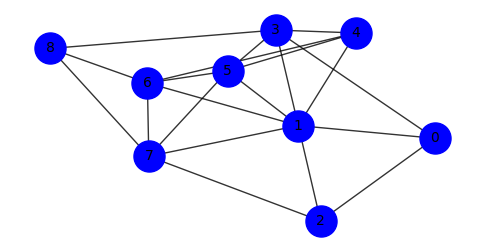

In [ ]:
# Se crea un nuevo espacio de código destinado para mostrar cada conexión hecha con sus respectivos pesos y mostrar el grafo de una manera gráfica
print("\nLISTA DE CIUDADES:\n")
print("0. Bucaramanga")
print("1. Bogota")
print("2. Medellin")
print("3. Miami")
print("4. Denver")
print("5. New York")
print("6. Paris")
print("7. Madrid")
print("8. Valencia\n")
print("CONEXIONES (VUELOS):\n")
print("Origen: (Destino, Duración en minutos, Precio en COP)")
grafo.imprimirGrafo()
print("\nGRAFO:\n")
grafo.dibujarGrafo()

In [ ]:
# Se crea un nuevo espacio de código para usarlo como "main"
while True:
    print(
        "\n¿Qué desea realizar?\n")  # Imprimimos el menú inicial en el que se escoge entre las 3 funciones del programa
    print(
        "1. Conocer vuelos directos\n2. Conocer vuelo más rápido\n3. Conocer vuelo más económico\n4. Realizar una oferta para un vuelo\n5. Eliminar oferta para un vuelo\n")
    listaCiudades = "0. Bucaramanga\n" \
                    "1. Bogota\n" \
                    "2. Medellin \n" \
                    "3. Miami\n" \
                    "4. Denver\n" \
                    "5. New York\n" \
                    "6. Paris\n" \
                    "7. Madrid\n" \
                    "8. Valencia\n"
    opcion1 = int(input())  # Se pide al usuario que ingrese la opción que desea ejecutar
    match opcion1:
        case 1:
            print("\n***CONOCER VUELOS DIRECTOS***\n")
            print(listaCiudades)
            grafo.conocerVuelosDirectos()  # Se llama el método definido anteriormente
            print("\n0.Salir\n1.Volver")
            opcion2 = int(input())  # Se da opción de regresar y ejecutar otra opción o detener el programa
            match opcion2:
                case 0:
                    break  # Si se ingresa '0' se cierra el ciclo deteniendo el programa
        case 2:
            print("\n***CONOCER VUELO MÁS RÁPIDO***\n")
            print(listaCiudades)
            grafo.vueloMasRapido()
            print("\n0.Salir\n1.Volver")
            opcion2 = int(input())
            match opcion2:
                case 0:
                    break
        case 3:
            print("\n***CONOCER VUELO MÁS ECONÓMICO***\n")
            print(listaCiudades)
            grafo.vueloMasBarato()
            print("\n0.Salir\n1.Volver")
            opcion2 = int(input())
            match opcion2:
                case 0:
                    break

        case 4:
            print("\n***REALIZAR UNA OFERTA PARA UN VUELO***\n"
                  "Solo se puede aplicar una oferta a un vuelo directo\n")
            print(listaCiudades)
            print("Vuelos directos:")
            grafo.imprimirGrafo()
            print("\nIngrese el número de la ciudad de origen: ")
            origen = int(input())
            print("\nIngrese el número de la ciudad de destino: ")
            destino = int(input())
            print("\nIngrese el porcentaje de descuento: ")
            porcentaje = int(input())
            grafo.hacerOferta(origen, destino, porcentaje) #Llamado a la función
            print("\n0.Salir\n1.Volver")
            opcion2 = int(input())
            match opcion2:
                case 0:
                    break

        case 5:
            print("\n***ELIMINAR OFERTA***\n"
                  "Solo se puede eliminar una oferta de un vuelo directo\n")
            print(listaCiudades)
            print("Vuelos directos:")
            grafo.imprimirGrafo()
            print("\nIngrese el número de la ciudad de origen: ")
            origen = int(input())
            print("\nIngrese el número de la ciudad de destino: ")
            destino = int(input())
            grafo.eliminarOferta(origen, destino) #Llamada al método
            print("\n0.Salir\n1.Volver")
            opcion2 = int(input())
            match opcion2:
                case 0:
                  break


¿Qué desea realizar?

1. Conocer vuelos directos
2. Conocer vuelo más rápido
3. Conocer vuelo más económico
4. Realizar una oferta para un vuelo
5. Eliminar oferta para un vuelo

3

***CONOCER VUELO MÁS ECONÓMICO***

0. Bucaramanga
1. Bogota
2. Medellin 
3. Miami
4. Denver
5. New York
6. Paris
7. Madrid
8. Valencia

Ingrese el número de la ciudad de origen: 0

Ingrese el número de la ciudad de destino:  6

Vuelo más económico desde Bucaramanga a París:

Bucaramanga -> Bogotá 	 Valor: $250000.	 Duración: 40 minutos
Bogotá -> París 	 Valor: $1800000.	 Duración: 600 minutos

Tiempo total de vuelo: 640 minutos.	 Valor total del vuelo: $2050000.

0.Salir
1.Volver
1

¿Qué desea realizar?

1. Conocer vuelos directos
2. Conocer vuelo más rápido
3. Conocer vuelo más económico
4. Realizar una oferta para un vuelo
5. Eliminar oferta para un vuelo

4

***REALIZAR UNA OFERTA PARA UN VUELO***
Solo se puede aplicar una oferta a un vuelo directo

0. Bucaramanga
1. Bogota
2. Medellin 
3. Miami
4. Denv